# Test average and std stats

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

import postproamrwindsample_xarray as ppsamplexr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amrdir = '/lustre/orion/cfd162/scratch/lcheung/ALCC_Frontier_WindFarm/MedWS_LowTI/precursor6_7kmX2km_5m/post_processing/'
ncfile = 'samplePlane_100000.nc'  # netcdf filename

In [3]:
timerange=[25000, 25200]   # Average between these times
extrafuncs=[# Define a function to calculate wind speed
            {'name':'WS',   'func':(lambda v: np.sqrt(v['velocityx']**2 + v['velocityy']**2))},
            # Define a function to calculate wind direction
            {'name':'WDir', 'func':(lambda v: (270.0 - 180.0/np.pi*np.arctan2(v['velocityy'], v['velocityx'])))},
            ]

In [4]:
ds=ppsamplexr.MinMaxStd_PlaneXR(amrdir+'/'+ncfile, timerange, groupname=None, extrafuncs=extrafuncs,
                                verbose=True, includeattr=False)

Calculating averages
[============================================================] 100.0% 
Calculating min/max/std
[============================================================] 100.0% 


In [5]:
# Print the available fields in ds
for k, g in ds.items(): print(k)

velocityx
velocityy
velocityz
times
group
x
y
z
velocityx_avg
velocityy_avg
velocityz_avg
WS_avg
WDir_avg
velocityx_std
velocityx_max
velocityx_min
velocityy_std
velocityy_max
velocityy_min
velocityz_std
velocityz_max
velocityz_min
WS_std
WS_max
WS_min
WDir_std
WDir_max
WDir_min


(0.0, 6720.0, 0.0, 2000.0)

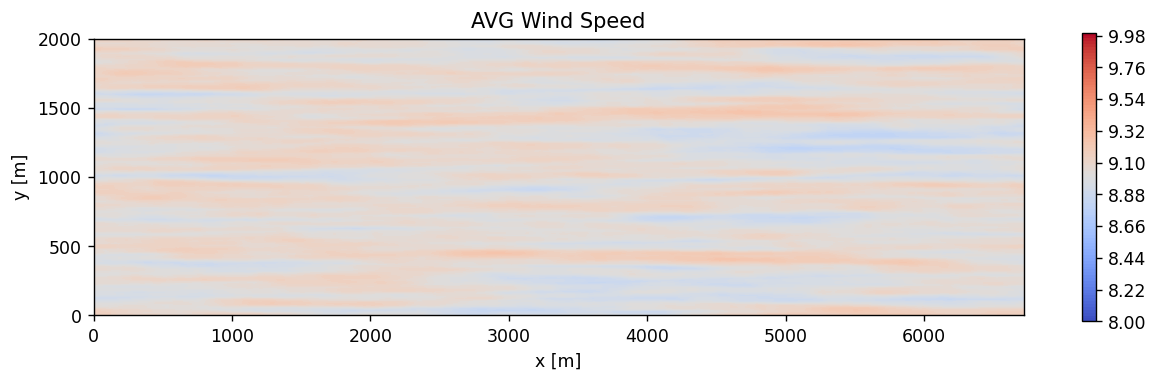

In [6]:
plt.figure(figsize=(12,3), dpi=125)
clevels=np.linspace(8, 10,101)
iplane=1
plt.contourf(ds['x'][iplane,:,:], ds['y'][iplane,:,:], ds['WS_avg'][iplane,:,:], levels=clevels, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('AVG Wind Speed')
plt.axis('scaled')

(0.0, 6720.0, 0.0, 2000.0)

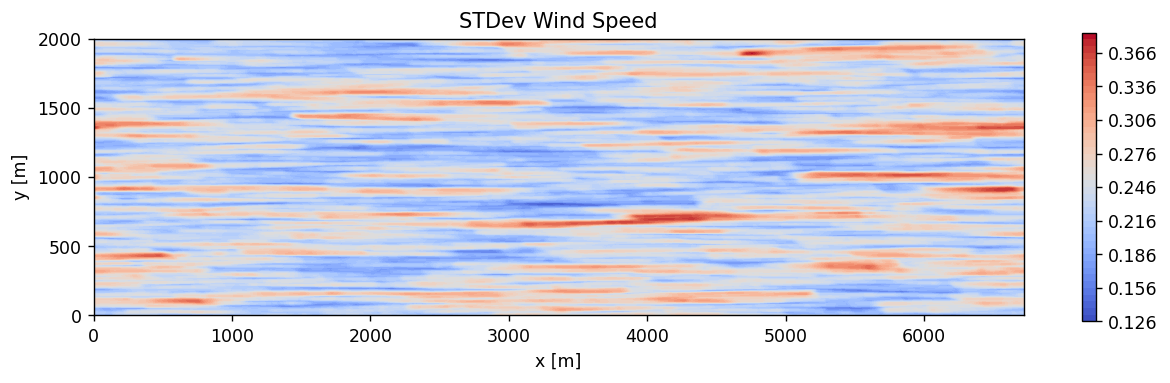

In [7]:
plt.figure(figsize=(12,3), dpi=125)
clevels=41 #np.linspace(8, 10,101)
iplane=1
plt.contourf(ds['x'][iplane,:,:], ds['y'][iplane,:,:], ds['WS_std'][iplane,:,:], levels=clevels, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('STDev Wind Speed')
plt.axis('scaled')

(0.0, 6720.0, 0.0, 2000.0)

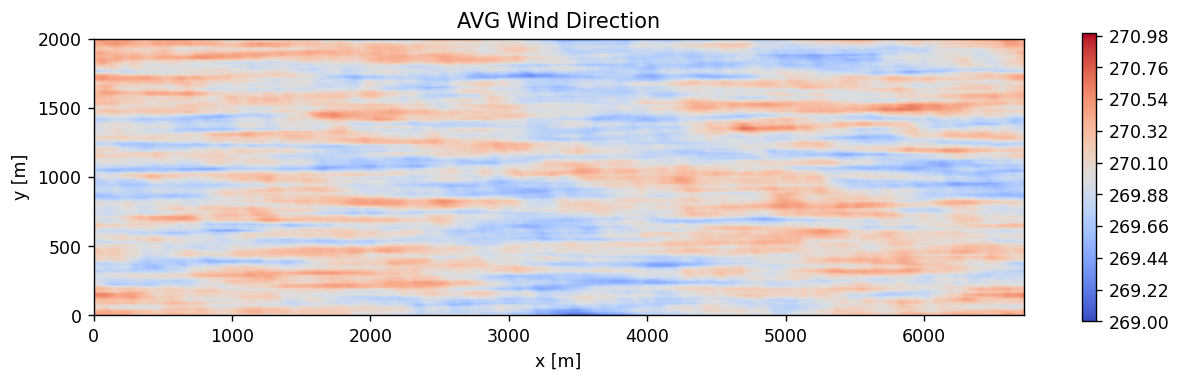

In [8]:
plt.figure(figsize=(12,3), dpi=125)
clevels=np.linspace(269, 271,101)
iplane=1
plt.contourf(ds['x'][iplane,:,:], ds['y'][iplane,:,:], ds['WDir_avg'][iplane,:,:], levels=clevels, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('AVG Wind Direction')
plt.axis('scaled')

(0.0, 6720.0, 0.0, 2000.0)

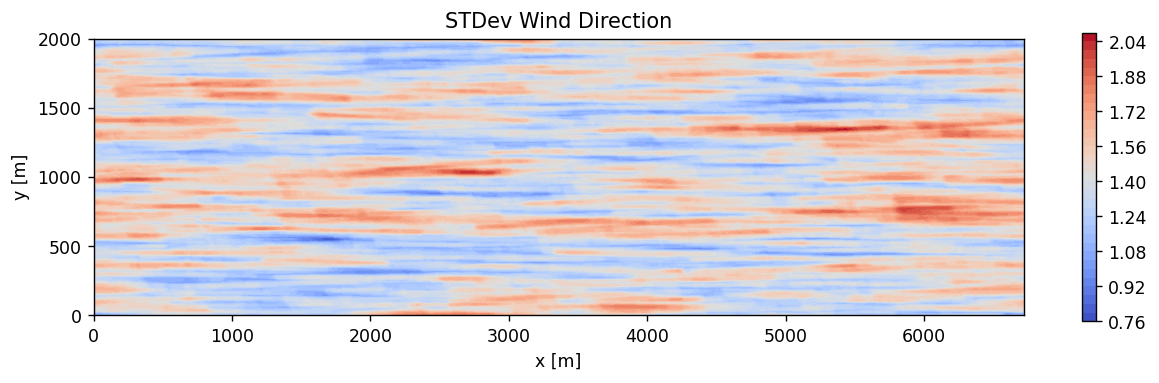

In [9]:
plt.figure(figsize=(12,3), dpi=125)
clevels=41 #np.linspace(269, 271,101)
iplane=1
plt.contourf(ds['x'][iplane,:,:], ds['y'][iplane,:,:], ds['WDir_std'][iplane,:,:], levels=clevels, cmap='coolwarm')
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('STDev Wind Direction')
plt.axis('scaled')